In [ ]:
# library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url="/content/drive/MyDrive/loan_data_2007_2014.csv"

In [ ]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)
df = pd.read_csv(url)
df.head(3)

<ipython-input-133-1bb61f567089>:3: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [ ]:
df.shape

(466285, 75)

kareana terlalu banyak kolom dan mising value alangkah lebih baik untuk menghapus kolom dengan banyak mising value

In [ ]:
# Hitung persentase missing value per kolom
missing_percentage = df.isnull().sum() / len(df)
# Dapatkan kolom yang memiliki lebih dari 50% missing value
cols_to_drop = missing_percentage[missing_percentage > 0.5].index
# Hapus kolom tersebut
df_1 = df.drop(cols_to_drop, axis=1)

In [ ]:
print('before drop =',df.shape)
print('after  drop =',df_1.shape)

before drop = (466285, 75)
after  drop = (466285, 54)


#EDA

In [ ]:
df_1.sample(4)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
47353,47353,9787592,11639473,12250,12250,12250.0,36 months,8.90,388.98,A,A5,Meeting Leader,3 years,MORTGAGE,35000.0,Not Verified,Dec-13,Current,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,My CC Payoff,760xx,TX,29.64,1.0,Sep-87,0.0,14.0,0.0,4155,20.6,40.0,f,4451.93,4451.93,9333.26,9333.26,7798.07,1535.19,0.00,0.00,0.0000,Jan-16,388.98,Feb-16,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,28979.0,20200.0
133126,133126,5524970,6897150,5000,5000,5000.0,36 months,12.12,166.36,B,B3,Abbadabba's Inc.,9 years,RENT,65000.0,Not Verified,Jun-13,Current,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Debt Consolidation,303xx,GA,9.64,0.0,Jul-00,1.0,6.0,0.0,5193,33.9,32.0,f,808.32,808.32,5155.48,5155.48,4191.68,963.80,0.00,0.00,0.0000,Jan-16,166.36,Feb-16,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,21328.0,15300.0
155955,155955,3699926,4672848,24925,24925,24850.0,60 months,15.80,603.49,C,C3,Hon-Dah Casino,10+ years,MORTGAGE,56500.0,Verified,Mar-13,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Credit Card Loan,859xx,AZ,31.09,0.0,Nov-94,0.0,21.0,0.0,35902,90.7,30.0,w,0.00,0.00,16324.40,16275.30,8845.24,7435.02,30.17,13.97,2.5146,Jun-15,1237.15,NaN,Dec-15,0.0,1,INDIVIDUAL,0.0,0.0,59217.0,39600.0
260189,260189,33621321,36264588,8400,8400,8400.0,36 months,6.49,257.42,A,A2,Programmer,4 years,MORTGAGE,75000.0,Not Verified,Nov-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,credit_card,Credit card refinancing,972xx,OR,10.43,1.0,Jan-89,0.0,13.0,0.0,6762,23.5,16.0,w,5325.52,5325.52,3600.85,3600.85,3074.48,526.37,0.00,0.00,0.0000,Jan-16,257.42,Feb-16,Jan-16,0.0,1,INDIVIDUAL,0.0,0.0,255863.0,28800.0


##Statistical analysis

In [ ]:
# memisahkan data berdasrkan tipe
cat = []
num = []
dat = []
for i in df_1.columns:
    if df_1[i].dtype == 'O':
        cat.append(i)
    elif df_1[i].dtype == 'int64' or df[i].dtype == 'float64':
        num.append(i)
    else:
        dat.append(i)

In [ ]:
df_1[num].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,466285.0,2.331420e+05,1.346050e+05,0.00,1.165710e+05,2.331420e+05,3.497130e+05,4.662840e+05
id,466285.0,1.307973e+07,1.089371e+07,54734.00,3.639987e+06,1.010790e+07,2.073121e+07,3.809811e+07
member_id,466285.0,1.459766e+07,1.168237e+07,70473.00,4.379705e+06,1.194108e+07,2.300154e+07,4.086083e+07
loan_amnt,466285.0,1.431728e+04,8.286509e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt,466285.0,1.429180e+04,8.274371e+03,500.00,8.000000e+03,1.200000e+04,2.000000e+04,3.500000e+04
funded_amnt_inv,466285.0,1.422233e+04,8.297638e+03,0.00,8.000000e+03,1.200000e+04,1.995000e+04,3.500000e+04
int_rate,466285.0,1.382924e+01,4.357587e+00,5.42,1.099000e+01,1.366000e+01,1.649000e+01,2.606000e+01
installment,466285.0,4.320612e+02,2.434855e+02,15.67,2.566900e+02,3.798900e+02,5.665800e+02,1.409990e+03
annual_inc,466281.0,7.327738e+04,5.496357e+04,1896.00,4.500000e+04,6.300000e+04,8.896000e+04,7.500000e+06
dti,466285.0,1.721876e+01,7.851121e+00,0.00,1.136000e+01,1.687000e+01,2.278000e+01,3.999000e+01


In [ ]:
df_1[cat].describe().transpose()

,count,unique,top,freq
term,466285,2,36 months,337953
grade,466285,7,B,136929
sub_grade,466285,35,B3,31686
emp_title,438697,205475,Teacher,5399
emp_length,445277,11,10+ years,150049
home_ownership,466285,6,MORTGAGE,235875
verification_status,466285,3,Verified,168055
issue_d,466285,91,Oct-14,38782
loan_status,466285,9,Current,224226
pymnt_plan,466285,2,n,466276


In [ ]:
cat_1=["term","grade","sub_grade","emp_length","home_ownership","verification_status","loan_status","pymnt_plan","purpose"
"purpose","initial_list_status","application_type"]

"

##Univariate analysis

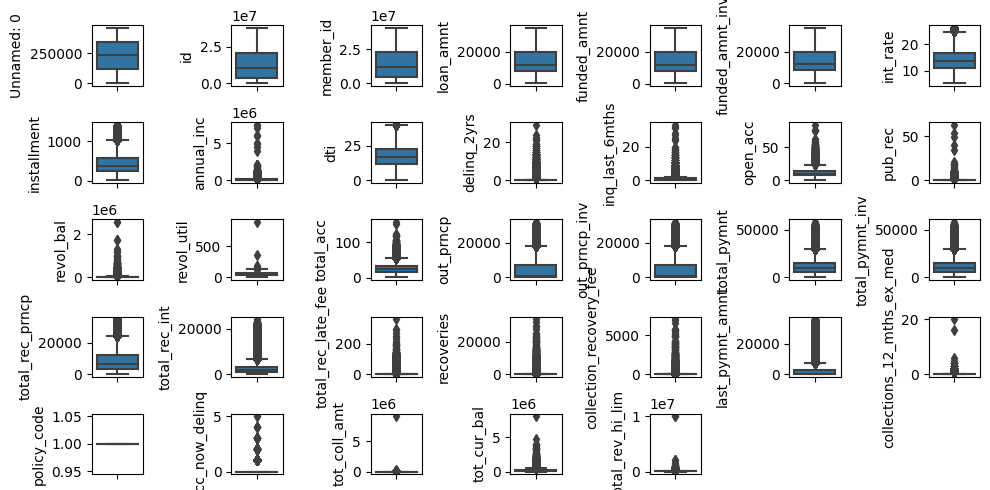

In [ ]:
plt.figure(figsize = (10,5))
for i in range(0, len(num)):
    plt.subplot(5,7, i+1)
    sns.boxplot(data= df_1, y=num[i], orient='v')
    plt.tight_layout()

In [ ]:
df_1[num].shape

(466285, 33)

In [ ]:
# Membagi list menjadi tiga
n = len(num) // 3

# Menyimpan tiga bagian dalam variabel num_a, num_b, dan num_c
num_a = num[:n]
num_b = num[n:2*n]
num_c = num[2*n:]

print("num_a:", num_a)
print("num_b:", num_b)
print("num_c:", num_c)

num_a: ['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs']
num_b: ['inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp']
num_c: ['total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']


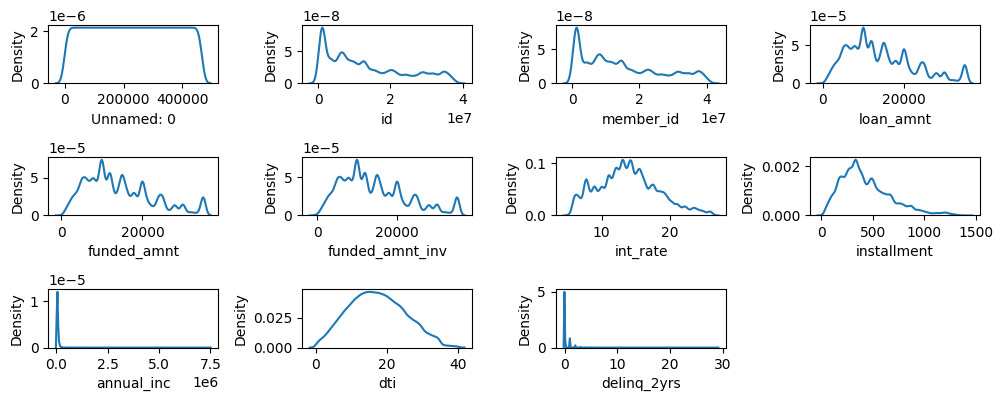

In [ ]:
plt.figure(figsize = (10,5))
for i in range(0, len(num_a)):
    plt.subplot(4,4, i+1)
    sns.kdeplot(data= df_1, x=num_a[i])
    plt.tight_layout()

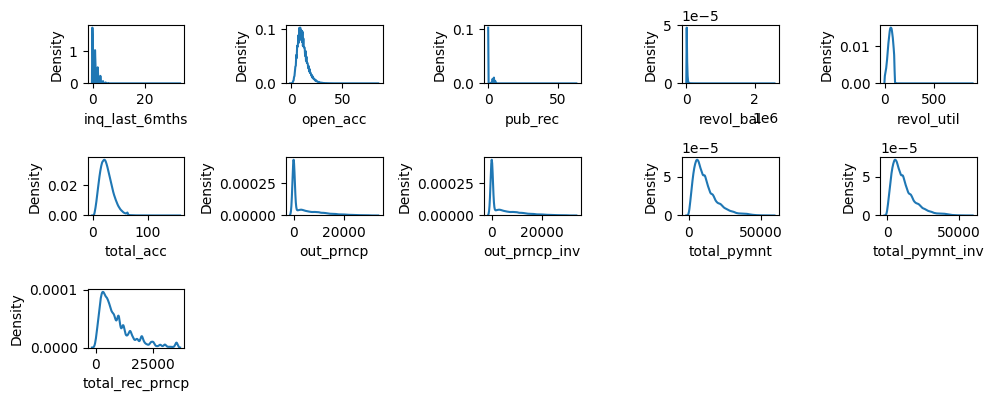

In [ ]:
plt.figure(figsize = (10,5))
for i in range(0, len(num_b)):
    plt.subplot(4,5, i+1)
    sns.kdeplot(data= df_1, x=num_b[i])
    plt.tight_layout()

<ipython-input-149-b55d980f77fc>:4: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data= df_1, x=num_c[i])


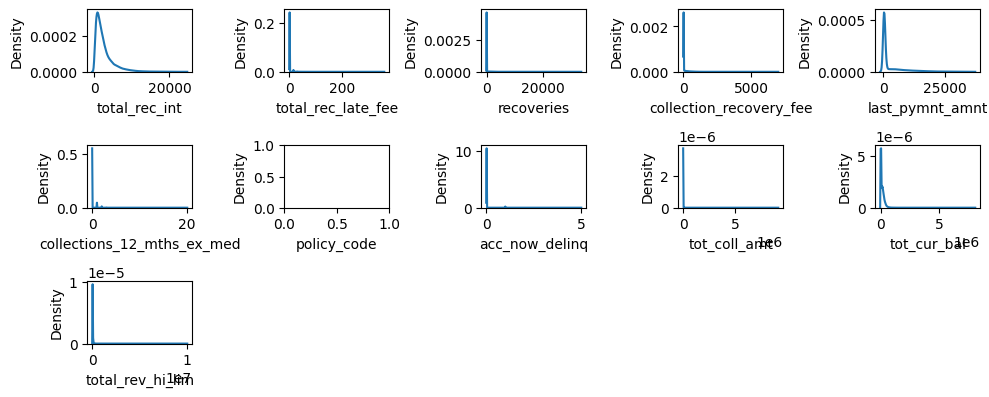

In [ ]:
plt.figure(figsize = (10,5))
for i in range(0, len(num_b)):
    plt.subplot(4,5, i+1)
    sns.kdeplot(data= df_1, x=num_c[i])
    plt.tight_layout()

Kolom purposepurpose tidak ada dalam DataFrame


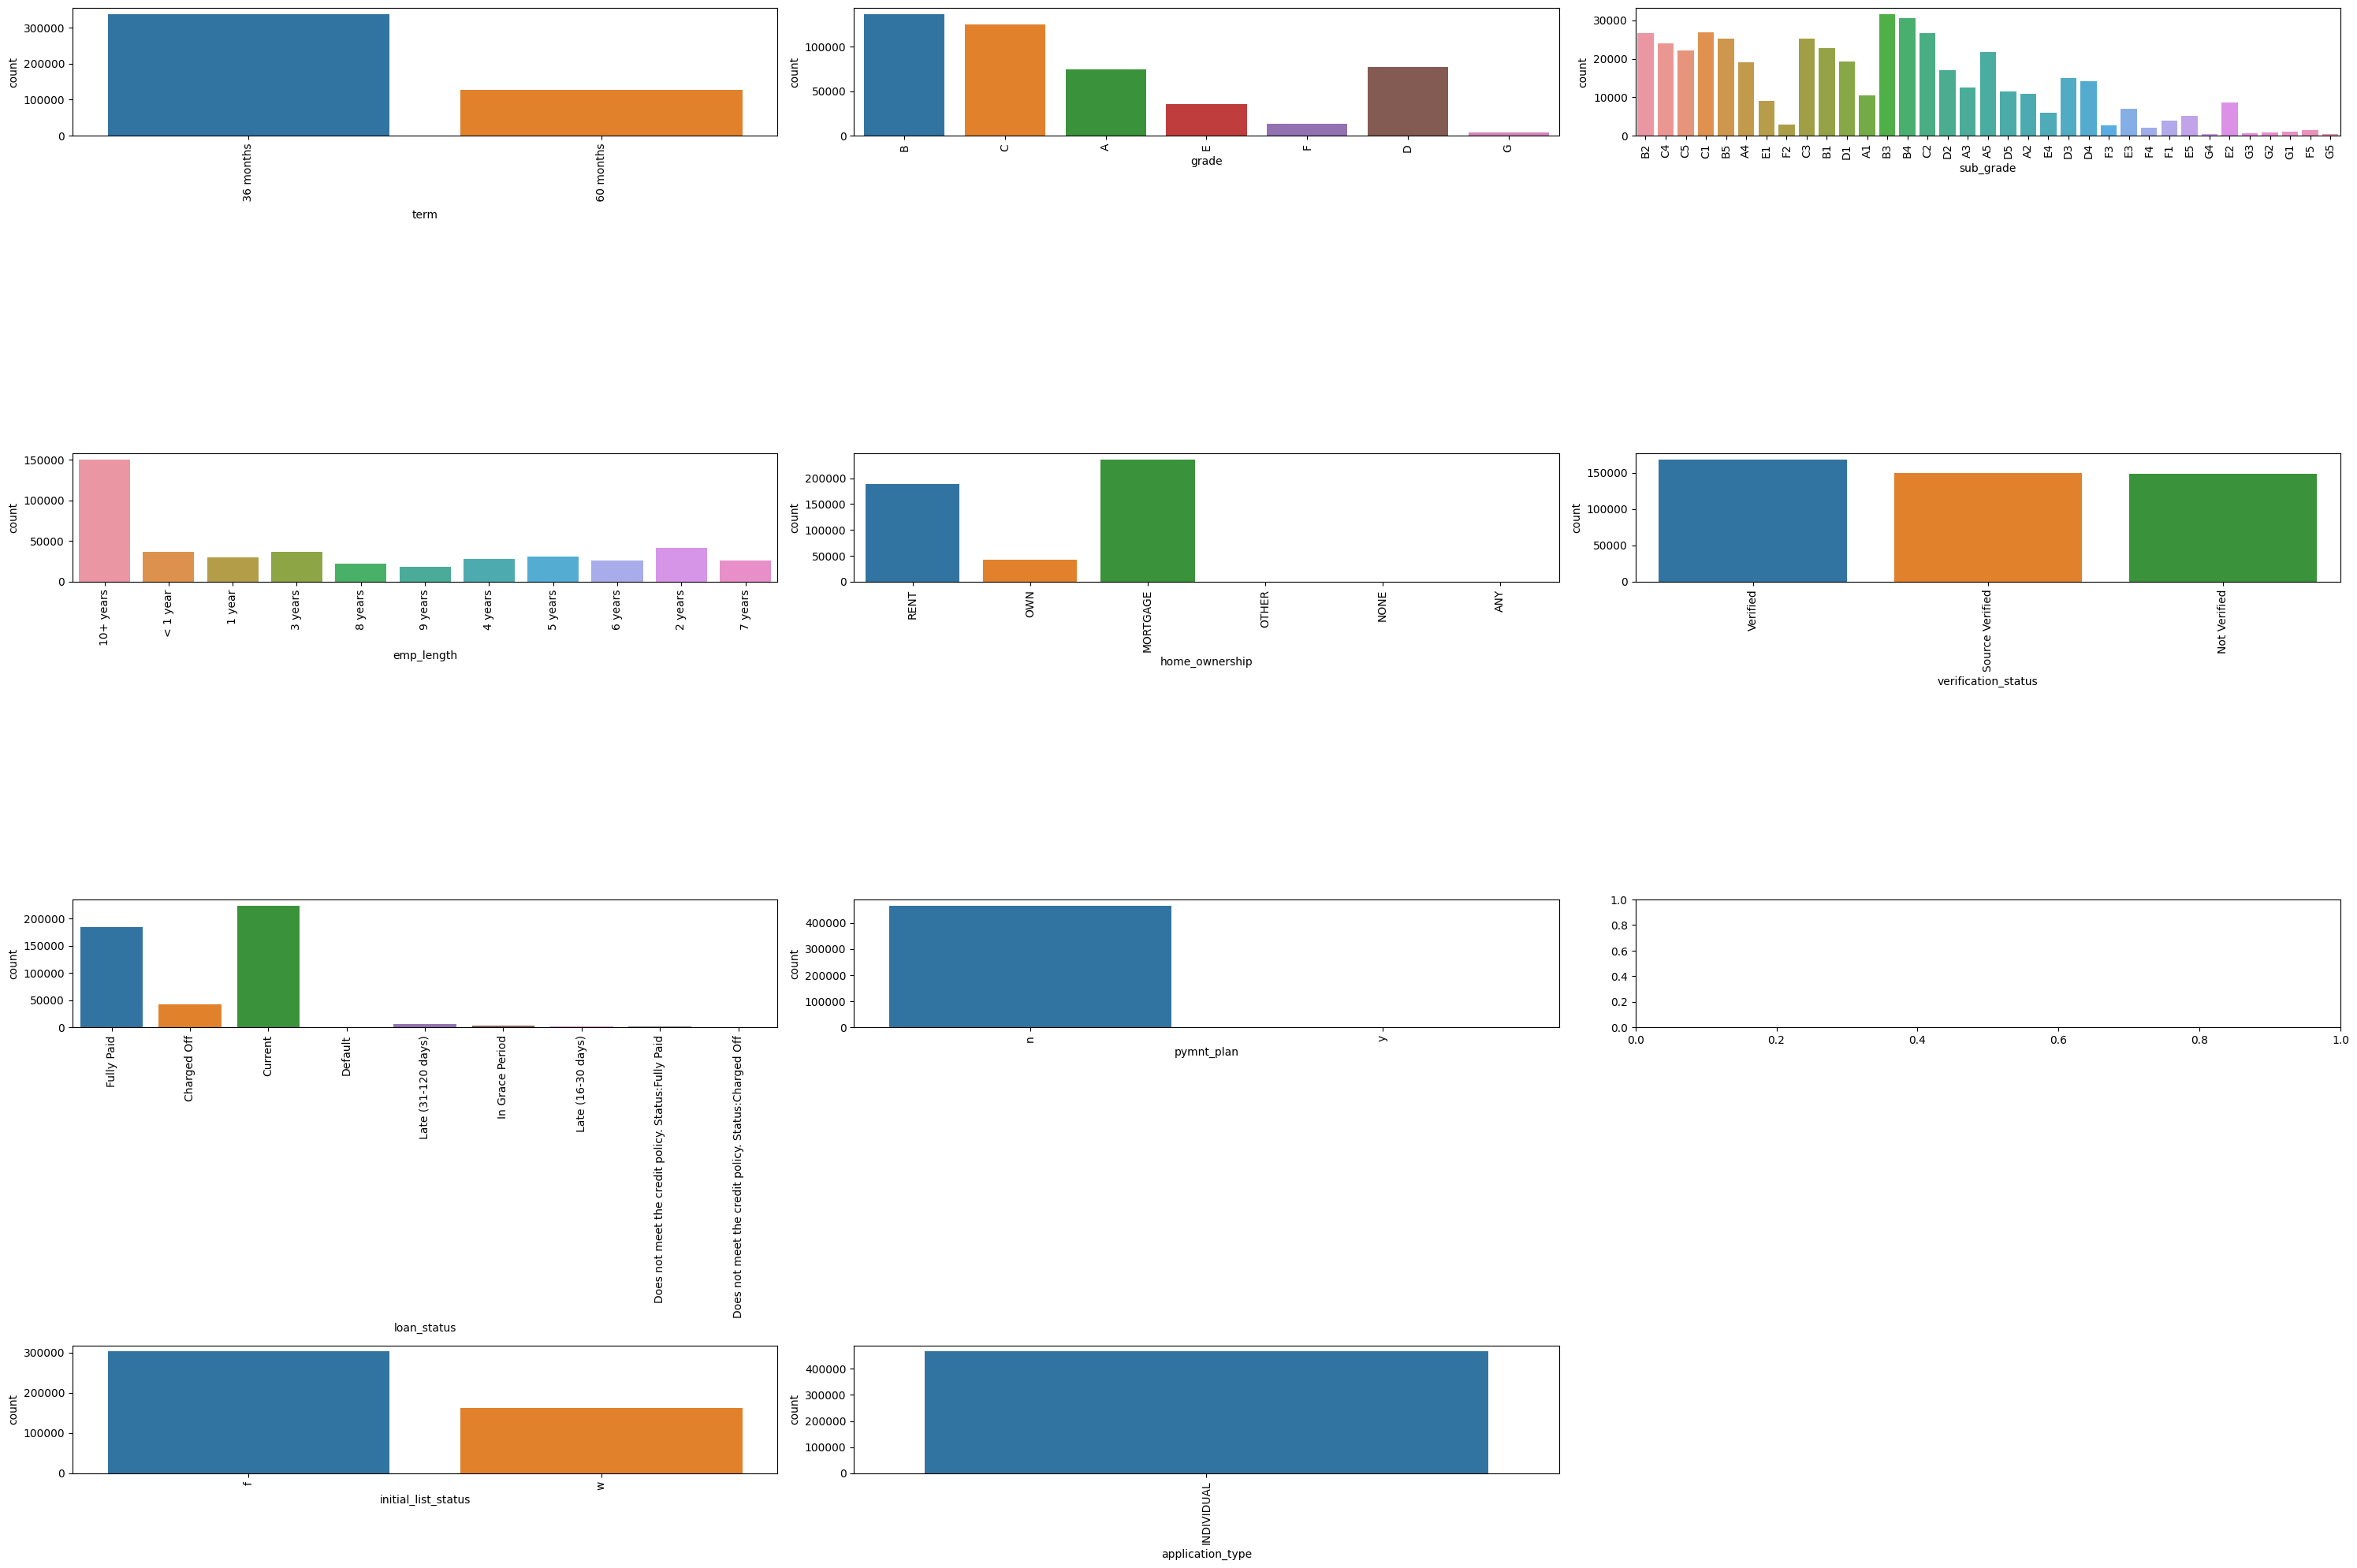

In [ ]:
plt.figure(figsize = (30,20)) # Meningkatkan ukuran gambar
for i in range(0, len(cat_1)):
    plt.subplot(4,3, i+1)
    if cat_1[i] in df_1.columns: # Memeriksa apakah kolom ada dalam df_1
        sns.countplot(data= df_1, x=cat_1[i])
        plt.xticks(rotation=90)
    else:
        print(f"Kolom {cat_1[i]} tidak ada dalam DataFrame")
plt.tight_layout()


##Multivariate analysis

<ipython-input-151-47554b41f356>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_1.corr(), cmap='Blues', annot=True, fmt='.2f')


<Axes: >

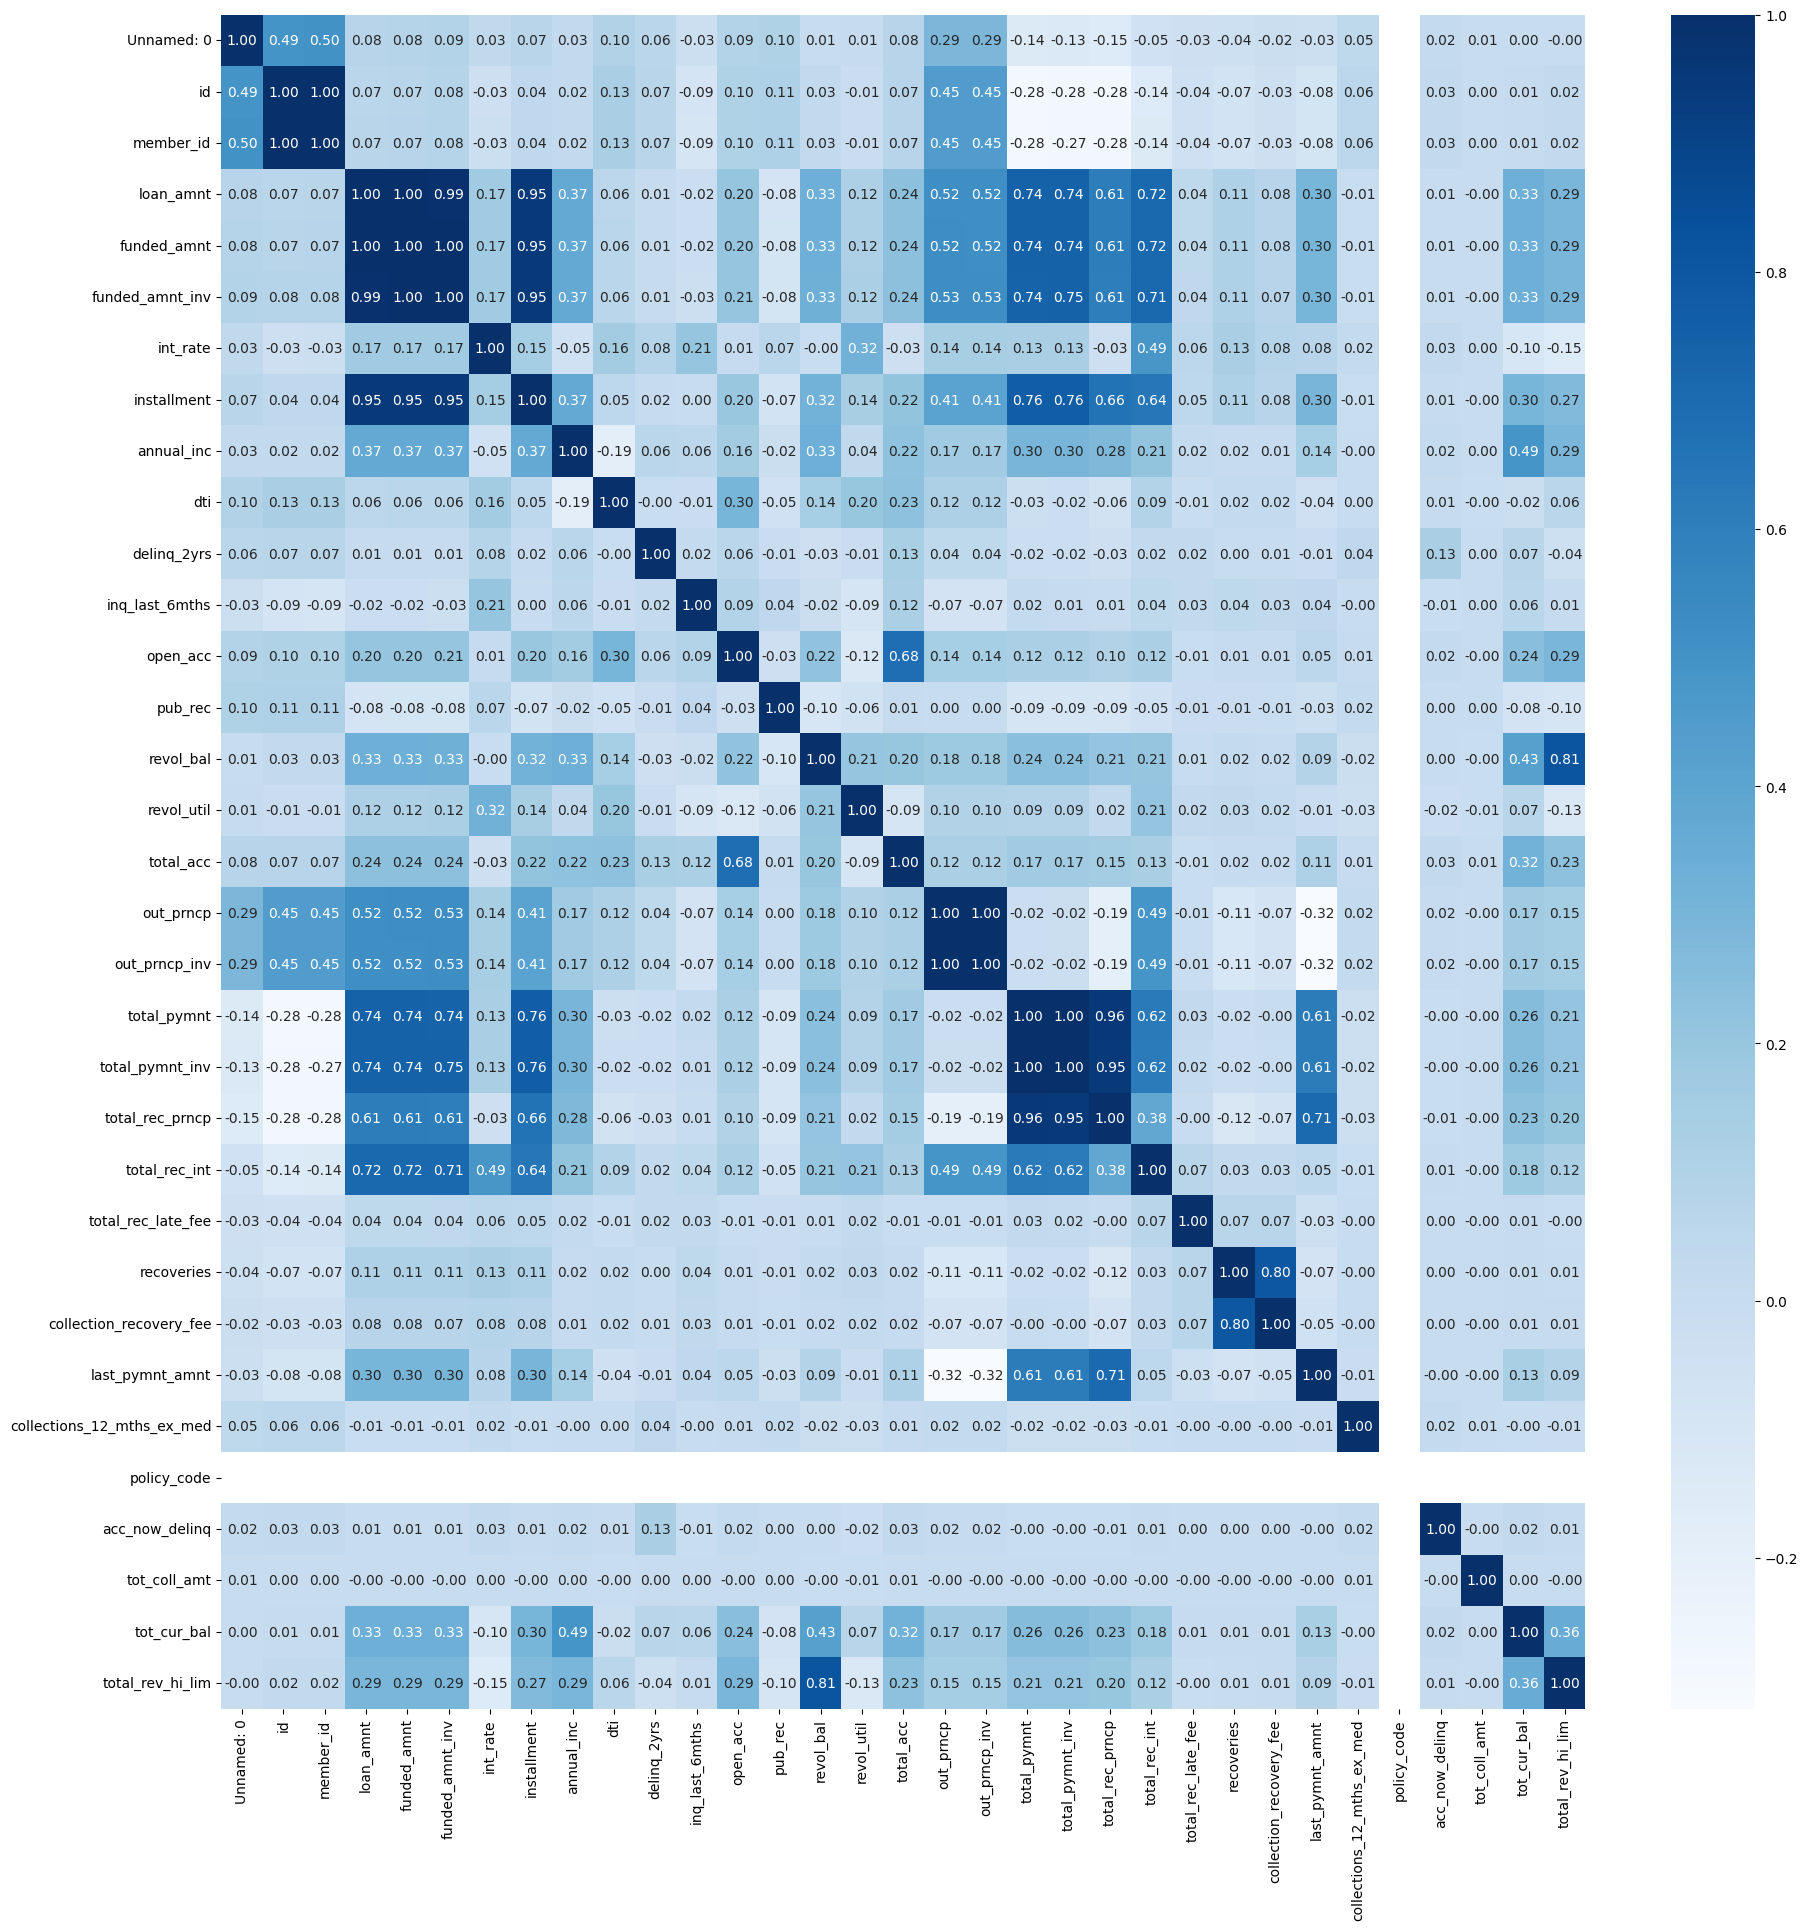

In [ ]:
plt.figure(figsize=(22, 22))
sns.heatmap(df_1.corr(), cmap='Blues', annot=True, fmt='.2f')

#insight

In [ ]:
# Select the features
features = [
    "annual_inc",
    "dti",
    "total_acc",
    "delinq_2yrs",
    "acc_now_delinq",
    "purpose",
]

In [ ]:
df_1[features].sample(10)

,annual_inc,dti,total_acc,delinq_2yrs,acc_now_delinq,purpose
226802,85000.0,11.28,11.0,0.0,0.0,home_improvement
30095,80000.0,8.38,8.0,0.0,0.0,debt_consolidation
404693,60000.0,21.96,23.0,0.0,0.0,debt_consolidation
17829,55000.0,24.89,34.0,0.0,0.0,debt_consolidation
431340,303000.0,6.50,22.0,0.0,0.0,credit_card
252313,70000.0,28.77,45.0,0.0,0.0,other
73427,90000.0,2.36,11.0,0.0,0.0,debt_consolidation
395130,100000.0,11.72,31.0,0.0,0.0,debt_consolidation
359623,42000.0,19.43,55.0,0.0,0.0,debt_consolidation
119694,60000.0,16.52,36.0,3.0,0.0,debt_consolidation


In [ ]:
df_1[features].isna().sum()

annual_inc         4
dti                0
total_acc         29
delinq_2yrs       29
acc_now_delinq    29
purpose            0
dtype: int64

In [ ]:
pur=df_1.groupby('purpose').agg({'id':'count'}).reset_index()
pur.columns=['purpose','total']
pur['%'] = round(pur.total*100/sum(pur.total),2)
pur.sort_values(by='%', ascending=False)

,purpose,total,%
2,debt_consolidation,274195,58.80
1,credit_card,104157,22.34
4,home_improvement,26537,5.69
9,other,23690,5.08
6,major_purchase,9828,2.11
11,small_business,7013,1.50
0,car,5397,1.16
7,medical,4602,0.99
8,moving,2994,0.64
12,vacation,2487,0.53


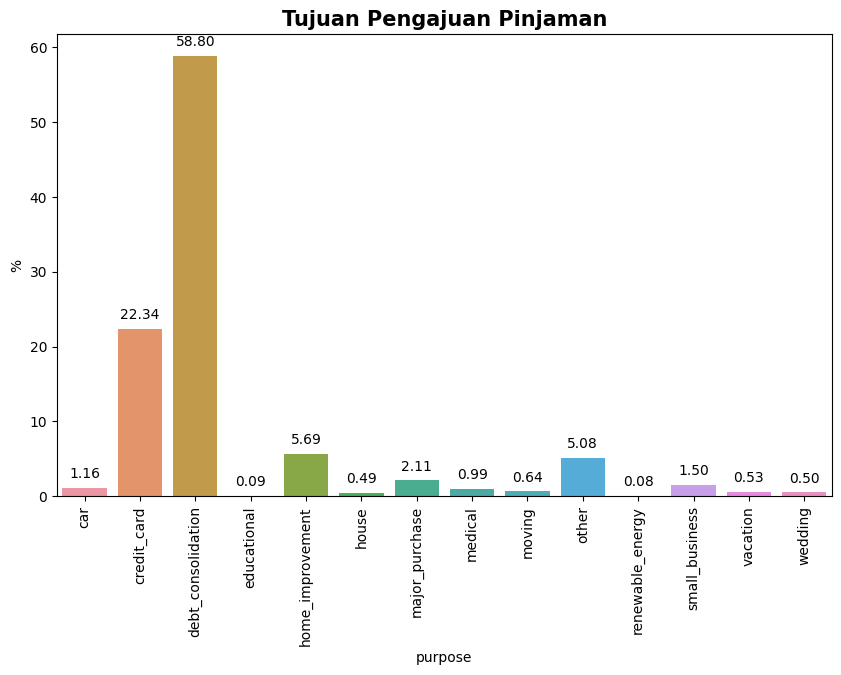

In [ ]:
# Plot
plt.figure(figsize=(10,6))
barplot = sns.barplot(x='purpose', y='%', data=pur)
plt.title('Tujuan Pengajuan Pinjaman', fontsize=15, fontweight='bold')
plt.xticks(rotation=90)

# Add numbers on top of each bar
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 10),
                     textcoords = 'offset points')

plt.show()

In [ ]:
df_1['delinq_2yrs'].value_counts()

0.0     382954
1.0      56224
2.0      16310
3.0       5684
4.0       2378
5.0       1236
6.0        629
7.0        346
8.0        177
9.0        111
10.0        65
11.0        41
12.0        38
13.0        25
14.0         8
15.0         7
18.0         6
16.0         5
17.0         3
19.0         3
21.0         2
22.0         2
29.0         1
24.0         1
Name: delinq_2yrs, dtype: int64

In [ ]:
dell= df_1.groupby('delinq_2yrs').agg({'id':'count'}).reset_index()
dell.columns=['delinq_2yrs','total']
dell

,delinq_2yrs,total
0,0.0,382954
1,1.0,56224
2,2.0,16310
3,3.0,5684
4,4.0,2378
5,5.0,1236
6,6.0,629
7,7.0,346
8,8.0,177
9,9.0,111


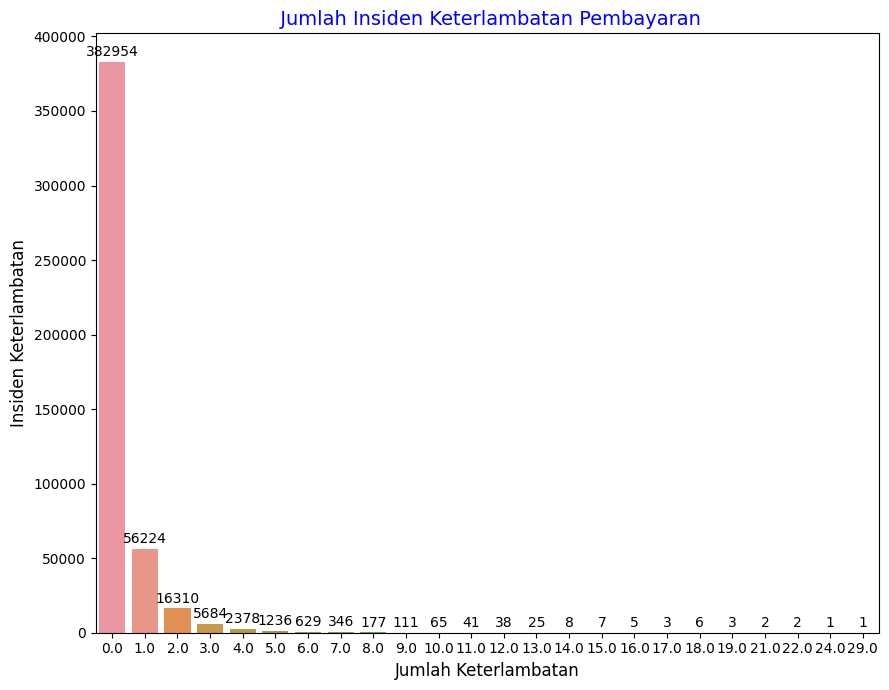

In [ ]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.barplot(y='total', x='delinq_2yrs', data=dell)
plt.title(' Jumlah Insiden Keterlambatan Pembayaran', fontsize='14', color='Blue')
plt.xlabel('Jumlah Keterlambatan', fontsize='12')
plt.ylabel('Insiden Keterlambatan', fontsize='12')
plt.bar_label(ax.containers[0], padding=2)
plt.tight_layout()

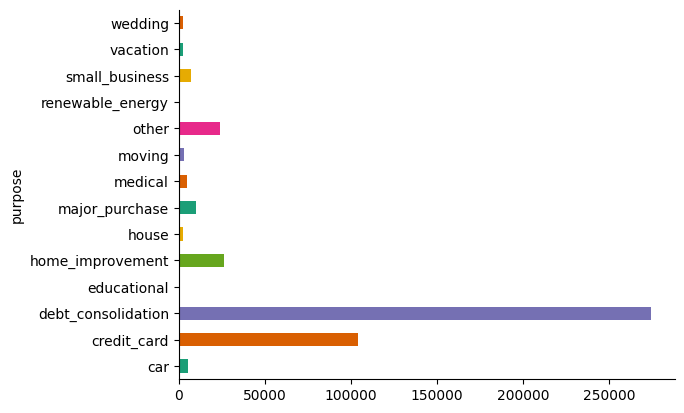

In [ ]:
df_1.groupby('purpose').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
term = df_1.groupby('term').agg({'id':'count'}).reset_index()
term.columns=['term','total']
term['%'] = round(term.total*100/sum(term.total),3)
term

,term,total,%
0,36 months,337953,72.478
1,60 months,128332,27.522


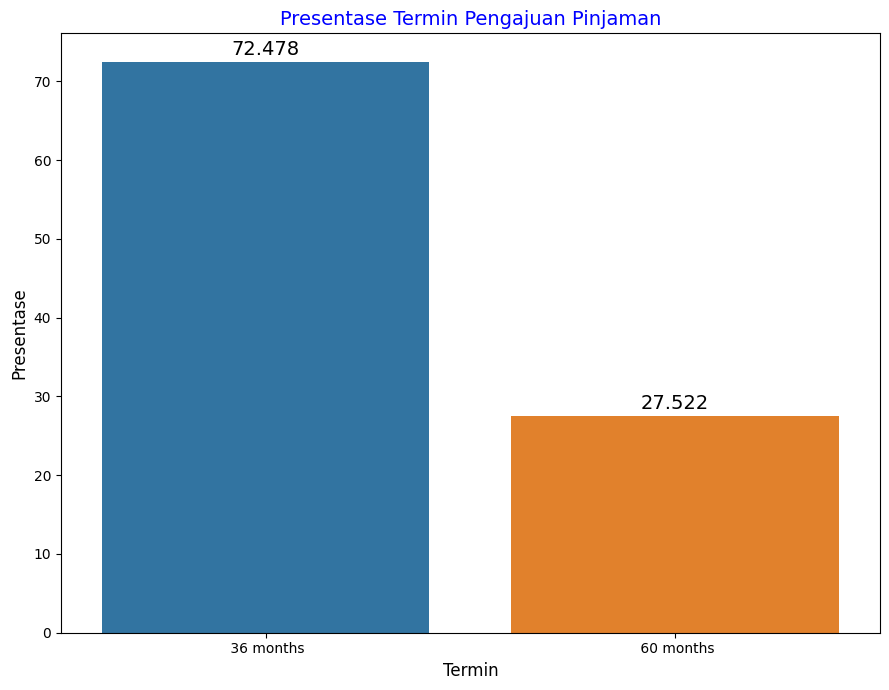

In [ ]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.barplot(x='term', y='%', data=term)
plt.title('Presentase Termin Pengajuan Pinjaman', fontsize='14', color='Blue')
plt.xlabel('Termin', fontsize='12')
plt.ylabel('Presentase', fontsize='12')
plt.bar_label(ax.containers[0], padding=2 , fontsize='14')
plt.tight_layout()


#data prepration

In [ ]:
df_1['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [ ]:
def label_loan_status(status):
    good_debt = ["Current", "Fully Paid", "Does not meet the credit policy. Status:Fully Paid"]
    if status in good_debt:
        return 1
    else:
        return 0

# Asumsikan bahwa 'df' adalah DataFrame Anda dan 'loan_status' adalah kolom yang berisi status pinjaman
df_1['target'] = df_1['loan_status'].apply(label_loan_status)

In [ ]:
df_1[['loan_status','target']]


,loan_status,target
0,Fully Paid,1
1,Charged Off,0
2,Fully Paid,1
3,Fully Paid,1
4,Current,1
...,...,...
466280,Current,1
466281,Charged Off,0
466282,Current,1
466283,Fully Paid,1


## fiture selection

Kemampuan membayar:
* Pendapatan: annual_inc
* Rasio utang terhadap pendapatan (debt-to-income ratio): dti

Riwayat kredit:
* Jumlah pinjaman yang pernah diambil: total_acc
* Terlambat bayar: delinq_2yrs
* Gagal bayar: acc_now_delinq
* lama pengajuan : term

Tujuan pinjaman: purpose

Kolom-kolom ini dapat memberikan informasi yang penting tentang kemampuan peminjam untuk membayar pinjaman, riwayat kredit peminjam, dan tujuan pinjaman peminjam.

In [ ]:
# Select the features
featur = [
    "annual_inc",
    "dti",
    "total_acc",
    "delinq_2yrs",
    "acc_now_delinq",
    "purpose",
    'term',
    'target'
]

In [ ]:
df_select = df_1[featur]
df_select

,annual_inc,dti,total_acc,delinq_2yrs,acc_now_delinq,purpose,term,target
0,24000.0,27.65,9.0,0.0,0.0,credit_card,36 months,1
1,30000.0,1.00,4.0,0.0,0.0,car,60 months,0
2,12252.0,8.72,10.0,0.0,0.0,small_business,36 months,1
3,49200.0,20.00,37.0,0.0,0.0,other,36 months,1
4,80000.0,17.94,38.0,0.0,0.0,other,60 months,1
...,...,...,...,...,...,...,...,...
466280,110000.0,19.85,36.0,0.0,0.0,debt_consolidation,60 months,1
466281,78000.0,18.45,30.0,0.0,0.0,debt_consolidation,60 months,0
466282,46000.0,25.65,43.0,0.0,0.0,debt_consolidation,60 months,1
466283,83000.0,5.39,27.0,3.0,0.0,credit_card,36 months,1


## data cleansing

## mising value

In [ ]:
df_select.isna().sum()

annual_inc         4
dti                0
total_acc         29
delinq_2yrs       29
acc_now_delinq    29
purpose            0
term               0
target             0
dtype: int64

In [ ]:
df_select = df_select.dropna()
df_select.isna().sum()

annual_inc        0
dti               0
total_acc         0
delinq_2yrs       0
acc_now_delinq    0
purpose           0
term              0
target            0
dtype: int64

## data duplicate

In [ ]:
# cek duplikat
df_select.duplicated().sum()

3441

In [ ]:
# menghapus duplikat
df_select.drop_duplicates(inplace=True)
df_select.duplicated().sum()

<ipython-input-171-197a6ad766bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select.drop_duplicates(inplace=True)


0

##Outliers

In [ ]:
from scipy import stats
print(f'Jumlah baris sebelum memfilter outlier: {len(df_select)}')

filtered_entries = np.array([True] * len(df_select))

for col in ['annual_inc','dti','total_acc','delinq_2yrs','acc_now_delinq']:

      Q1 = df[col].quantile(0.25)
      Q3 = df[col].quantile(0.75)
      IQR = Q3 - Q1
      low_limit = Q1 - (IQR * 1.5)
      high_limit = Q3 + (IQR * 1.5)

      filtered_entries = ((df_select[col] >= low_limit) & (df_select[col] <= high_limit)) & filtered_entries

df_select = df_select[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df_select)}')

Jumlah baris sebelum memfilter outlier: 462815
Jumlah baris setelah memfilter outlier: 358691


In [ ]:
df_select.shape

(358691, 8)

## encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
# membuat instance dari LabelEncoder
le = LabelEncoder()

# melakukan label encoding pada kolom 'purpose'
df_select['purpose'] = le.fit_transform(df_select['purpose'])


<ipython-input-174-bd447247bcf1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['purpose'] = le.fit_transform(df_select['purpose'])


In [ ]:
# Menghapus karakter non-angka dan mengubah tipe data menjadi integer
df_select['term'] = df_select['term'].apply(lambda x: int(''.join(filter(str.isdigit, x))))

## Transformation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [ ]:
# Split data
X = df_select.drop('target', axis=1)
y = df_select['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Apply SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [ ]:
# Normalisasi
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train_res =  scaler.transform(X_train_res)

#modeling untuk beberapa model ml

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from time import time
import pandas as pd

def fit_ml_models(X_train, y_train, X_test, y_test):
    models = [
        ('Logistic Regression', LogisticRegression()),
        ('Decision Tree', DecisionTreeClassifier()),
        ('Random Forest', RandomForestClassifier()),
        ('Gradient Boosting', GradientBoostingClassifier()),
        ('KNN', KNeighborsClassifier())
    ]

    results = []

    for name, model in models:
        start = time()
        model.fit(X_train, y_train)
        end = time()
        time_taken = end - start

        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        cm = confusion_matrix(y_test, y_pred)

        results.append([name, accuracy, precision, recall, f1, time_taken, cm])

    df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F-1 Score', 'Time', 'Confusion Matrix'])

    return df

# Use the function
results_df = fit_ml_models(X_train_res, y_train_res, X_test, y_test)


In [ ]:
results_df
#menggunakan data smote

,Model,Accuracy,Precision,Recall,F-1 Score,Time,Confusion Matrix
0,Logistic Regression,0.571028,0.908629,0.569720,0.700327,0.401443,"[[5006, 3616], [27158, 35959]]"
1,Decision Tree,0.750889,0.883350,0.825926,0.853674,6.686835,"[[1738, 6884], [10987, 52130]]"
2,Random Forest,0.769024,0.883273,0.849771,0.866198,158.370507,"[[1534, 7088], [9482, 53635]]"
3,Gradient Boosting,0.726481,0.890882,0.785303,0.834768,87.335027,"[[2551, 6071], [13551, 49566]]"
4,KNN,0.628278,0.886385,0.662405,0.758199,1.887184,"[[3263, 5359], [21308, 41809]]"


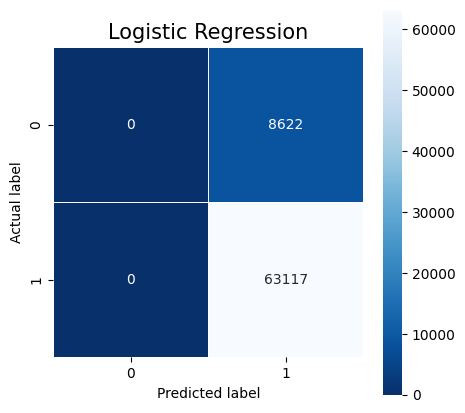

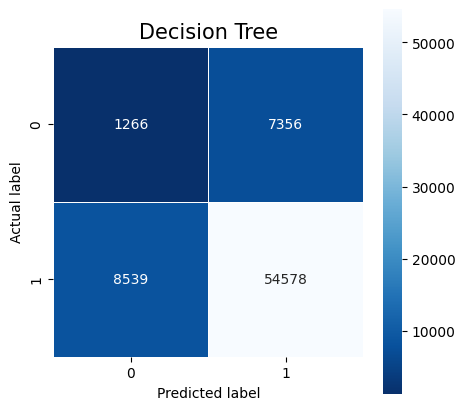

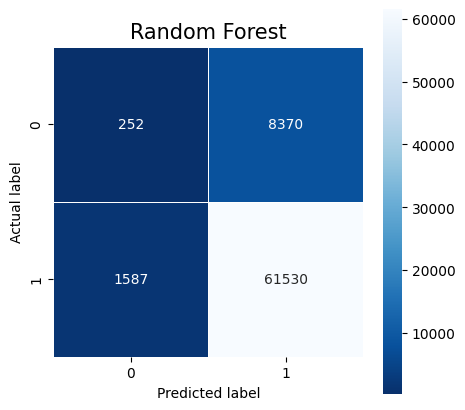

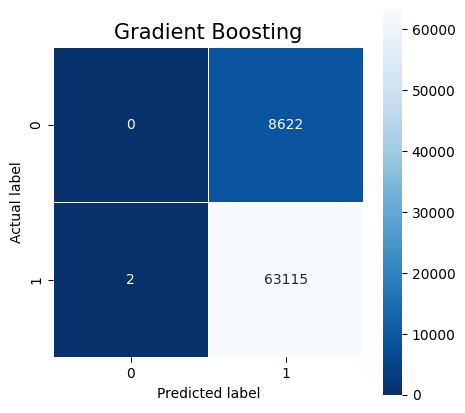

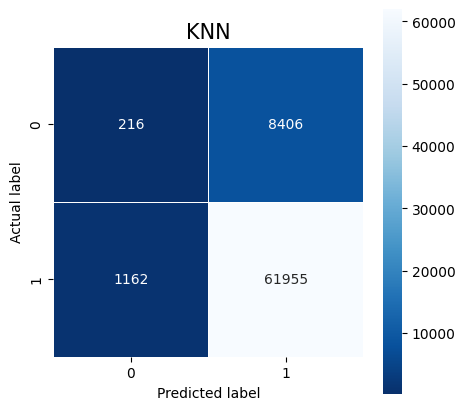

,Accuracy (train set),Accuracy (test set),Precision (train set),Precision (test set),Recall (train set),Recall (test set),F-1 Score (train set),F-1 Score (test set),AUC (train set),AUC (test set),Time taken
Model,,,,,,,,,,,
Logistic Regression,0.879,0.880,0.879,0.880,1.000,1.000,0.936,0.936,0.500,0.500,0.403
Decision Tree,0.998,0.778,1.000,0.881,0.998,0.865,0.999,0.873,0.999,0.506,3.038
Random Forest,0.998,0.861,0.998,0.880,1.000,0.975,0.999,0.925,0.992,0.502,73.570
Gradient Boosting,0.879,0.880,0.879,0.880,1.000,1.000,0.936,0.936,0.500,0.500,34.422
KNN,0.884,0.867,0.889,0.881,0.991,0.982,0.937,0.928,0.546,0.503,49.069


In [ ]:
import time

# Daftar model # tidak menggunakand ata smote
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('KNN', KNeighborsClassifier())
]

# Fungsi untuk menghitung metrik
def calculate_metrics(model, X_train, X_test, y_train, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    end_time = time.time()
    time_taken = end_time - start_time
    return {
        'Accuracy (train set)': round(accuracy_score(y_train, y_train_pred), 3),
        'Accuracy (test set)': round(accuracy_score(y_test, y_test_pred), 3),
        'Precision (train set)': round(precision_score(y_train, y_train_pred), 3),
        'Precision (test set)': round(precision_score(y_test, y_test_pred), 3),
        'Recall (train set)': round(recall_score(y_train, y_train_pred), 3),
        'Recall (test set)': round(recall_score(y_test, y_test_pred), 3),
        'F-1 Score (train set)': round(f1_score(y_train, y_train_pred), 3),
        'F-1 Score (test set)': round(f1_score(y_test, y_test_pred), 3),
        'AUC (train set)': round(roc_auc_score(y_train, y_train_pred), 3),
        'AUC (test set)': round(roc_auc_score(y_test, y_test_pred), 3),
        'Time taken': round(time_taken, 3)
    }

# DataFrame untuk menyimpan hasil
results = []

# Iterasi melalui setiap model
for name, model in models:
    result = calculate_metrics(model, X_train, X_test, y_train, y_test)
    result['Model'] = name
    results.append(result)

    # Plot confusion matrix
    cm = confusion_matrix(y_test, model.predict(X_test))
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    plt.title(name, size = 15);
    plt.show()

# Menampilkan hasil
df_results = pd.DataFrame(results)
df_results.set_index('Model', inplace=True)
df_results


# memilih model terbaik

Berdasarkan metrik-metrik di atas, secara umum, Random Forest tampaknya memberikan hasil yang baik dengan Precision yang baik, tingginya Recall, dan F1 Score yang seimbang.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import time

# Create the model
rf = RandomForestClassifier(random_state=42)

# Record the start time
start_time = time.time()

# Train the model
rf.fit(X_train_res, y_train_res)

# Record the end time
end_time = time.time()

# Make predictions
y_pred = rf.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a DataFrame for the results
results_rf = pd.DataFrame({
    'mechin_model': ['Random Forest'],
    'Accuracy': [accuracy],
    'Precision': [precision],
    'Recall': [recall],
    'F-1 Score': [f1],
    'Time taken': [end_time - start_time]
})

results_rf


,mechin_model,Accuracy,Precision,Recall,F-1 Score,Time taken
0,Random Forest,0.769163,0.883558,0.849597,0.866245,168.25211
